# 선형회귀분석 회귀계수 및 절편값 구하기

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [81]:
import warnings
warnings.filterwarnings('ignore')

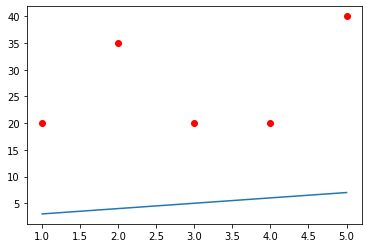

In [6]:
x = [1, 2, 3, 4, 5]
y = [20, 35, 20, 20, 40]
plt.plot(x,y,'ro') #  r:red, o:circle

y_hat = np.array(x)*w+b # 선형회귀식
plt.plot(x,y_hat)
plt.show()

[2 3 4 5 6]


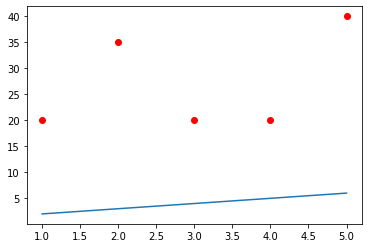

[ 4  6  8 10 12]


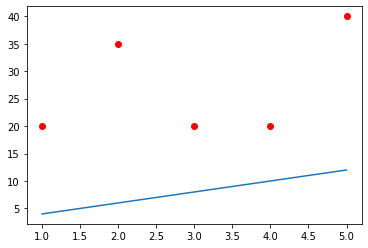

[ 5  8 11 14 17]


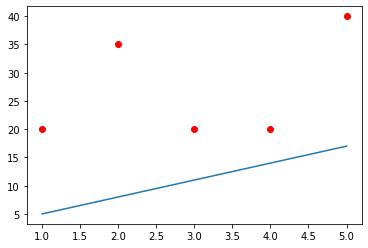

[ 6 10 14 18 22]


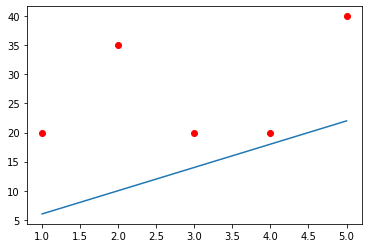

[ 8 13 18 23 28]


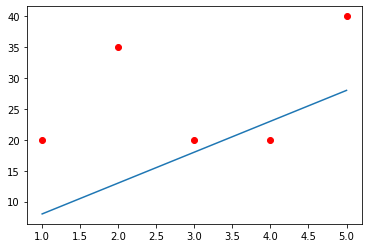

In [7]:
w, b = [1, 2, 3, 4, 5], [1, 2, 2, 2, 3] # 인공신경망은 여러개의 선형 회귀계수를 구함

for w1, b1 in zip(w,b):
    y_hat = np.array(x)*w1+b1
    print(y_hat)
    plt.plot(x,y,'ro')
    plt.plot(x,y_hat)
    plt.show()

[0.102 0.127 0.152 0.172 0.202]
209.245


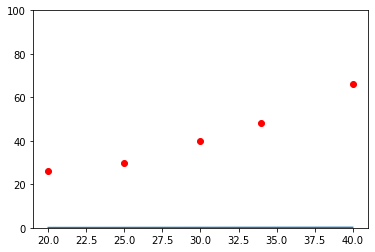

[0.2134299  0.26574115 0.3180524  0.3599014  0.4226749 ]
208.42020025


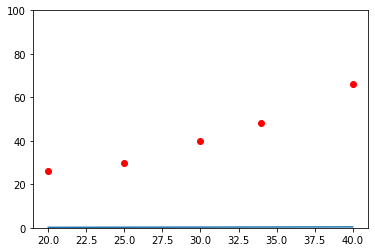

[0.44483102 0.55385824 0.66288545 0.75010722 0.88093987]
206.70737819750101


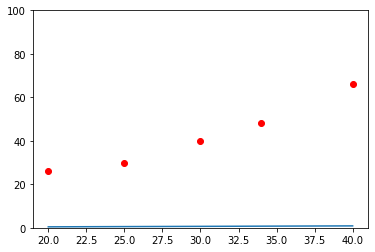

[0.91949855 1.14486584 1.37023313 1.55052697 1.82096771]
203.193907798095


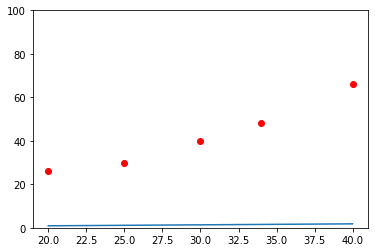

[1.86836503 2.32629764 2.78423025 3.15057633 3.70009546]
196.17043528660787


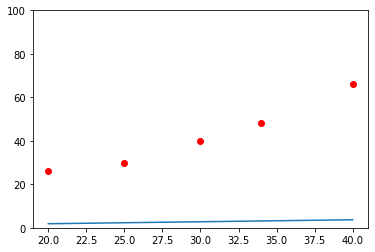

[3.66517982 4.56350821 5.46183659 6.1804993  7.25849337]
182.87048270349553


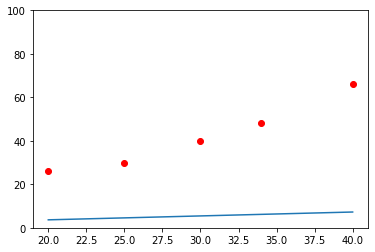

[ 6.70253203  8.34530949  9.98808695 11.30230891 13.27364186]
160.38812076475392


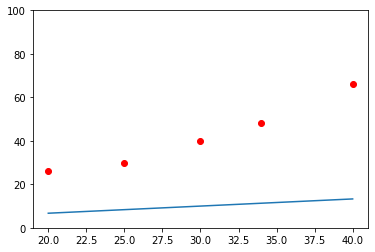

[10.75006517 13.38488506 16.01970495 18.12756087 21.28934474]
130.42843921850965


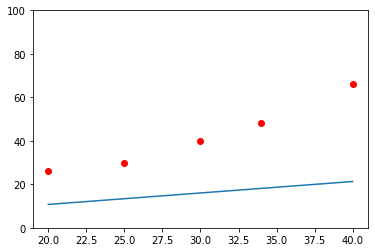

[14.02114221 17.45769667 20.89425114 23.64349471 27.76736006]
106.21605521089438


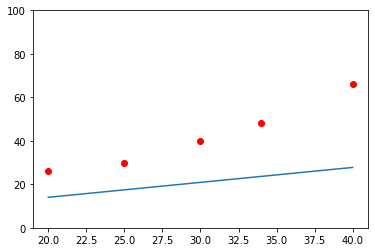

[14.89270415 18.54287674 22.19304932 25.11318739 29.49339449]
99.76478790275945


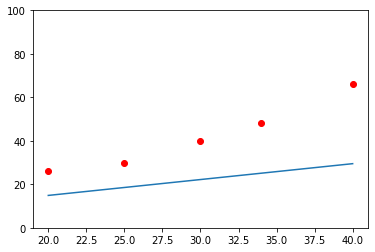

In [92]:
w=0.5;b=0.2;le=0.01;err=1

for epoch in range(10): # 인공신경망에서 자료를 몇 번 돌릴지의 반복횟수를 epoch라고 함.
    w=w*err*le; b=b*err*le # 인공신경망에서는 w와 b의 오차역전파 수식을 이용하여서 업데이트 함(오차의 영향을 받음, 이 식은 예시)
    y_hat = np.array(x)*w+b # 예측분류에 따라 y_hat을 구하는 공식이 다름

    err = np.mean(np.sum(y-y_hat)) # 오차, 예측분류에 따라 오차값을 구하는 공식이 다름

    print(y_hat)
    print(err)
    plt.ylim([0,100])
    plt.plot(x,y,'ro')
    plt.plot(x,y_hat)
    plt.show()

In [ ]:
w=0.5;b=0.2;le=0.01;err=1
batch = 2 # batch size라는 것은 한 번에 학습할 때, 이용하는 데이터의 개수

for epoch in range(10): # 인공신경망에서 자료를 몇 번 돌릴지의 반복횟수를 epoch라고 함. 한 번의 epoch는 전체 데이터 셋에 대하여 한 번 학습을 완료한 상태.

    for i in range(len(x)/batch): 
        w=w*err*le # # 인공신경망은 w와 b를 여러개 사용
        b=b*err*le # 인공신경망에서는 w와 b의 오차역전파 수식을 이용하여서 업데이트 함(오차의 영향을 받음, 이 식은 예시)

        y_hat = np.array(x[0:batch])*w+b # 예측분류에 따라 y_hat을 구하는 공식이 다름

        err = np.sum(y-y_hat)**2)/len(x) # 오차, 예측분류에 따라 오차값을 구하는 공식이 다름

        print(y_hat)
        print(err)

## 1. 상관계수 R 구하기
- $r = \frac{1}{(n-1)}\sum(\frac{x-\bar{x}}{S_x})(\frac{y-\bar{y}}{S_y})$

In [28]:
x=[20,25,30,34,40]
y=[26,30,40,48,66]
df=pd.DataFrame({'x':x,'y':y})

In [76]:
x=[20,25,30,34,40]
y=[26,30,40,48,66]
df=pd.DataFrame({'x':x,'y':y})

print(df)
df.corr()
print(df.corr(method='pearson'))   # method 생략하면 기본 pearson

df['x'].corr(df['y'])

    x   y
0  20  26
1  25  30
2  30  40
3  34  48
4  40  66
          x         y
x  1.000000  0.978521
y  0.978521  1.000000


0.9785212611534365

In [27]:
# 식으로 작성
# corr만 함수식으로 작성하지 않고, 직접 상관도 값을 구하기
x = np.array([20, 25, 30, 34, 40])
y = np.array([26, 30, 40, 48, 66])

x_std = np.sqrt(np.sum((x-np.mean(x))**2)/(len(x)-1))
y_std = np.sqrt(np.sum((y-np.mean(y))**2)/(len(y)-1))

r = np.sum((x-np.mean(x))*(y-np.mean(y)))/(np.std(x,ddof=1)*np.std(y,ddof=1))/(len(x)-1)
print(r)

0.9785212611534364


## 2. 기울기
- $w = r\frac{S_y}{S_x}$

In [29]:
r = df['x'].corr(df['y'])
w = r*df['y'].std()/df['x'].std()
w

2.0099667774086383

## 3. 절편
- $b = \bar{y}-\bar{x}*w$

In [32]:
b = df['y'].mean() - df['x'].mean()*w
b

-17.897009966777425

## 4. 선형회귀 공식
- lr = w*x + b

In [33]:
df['lr'] = df['x']*w+b # 선형회귀식
df['err'] = df['y']-df['lr'] # 오차
df['err2'] = (df['y']-df['lr'])**2 # 오차 제곱
df

,x,y,lr,err,err2
0,20,26,22.302326,3.697674,13.672796
1,25,30,32.352159,-2.352159,5.532654
2,30,40,42.401993,-2.401993,5.769572
3,34,48,50.441860,-2.441860,5.962683
4,40,66,62.501661,3.498339,12.238375


In [35]:
newX = 3
newY = newX*w + b # 예측값
newY

-11.867109634551511

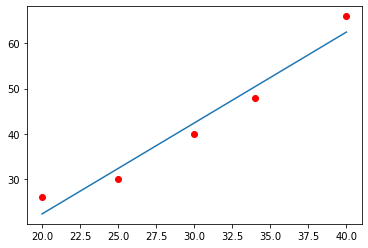

In [36]:
# 직접 계산한 w,b로 작성한 차트
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['lr']) # wx+b
plt.show()

In [37]:
def prediction(newX):
    print(w*newX+b)

In [38]:
prediction(3)

-11.867109634551511


## 5. 사이킷런의 선형회귀식 적용
- 사이킷런 모듈은 통계학적 계산식이 주를 이룸
- 파이썬 파이프에서는 sklearn, 콘다 파이프에서는 scikit-learn

In [ ]:
!pip install sklearn  # pip 인스톨  conda install scikit-learn?

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
# sklearn ML 계산에 참여하는 자료는 모두 array여야 함.
# array는 2차원 배열이어야 함!

x = df['x'].values
y = df['y'].values

np.shape(x) # (5,)
#model.fit(x, y) => 오류

(5,)

In [43]:
x1 = x.reshape(-1,1)
print(np.shape(x1))
x1

(5, 1)


array([[20],
       [25],
       [30],
       [34],
       [40]])

In [45]:
x = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)
model=model.fit(x,y)
model.predict([[3]]) # 2차원 배열로 전달함에 주의!

array([[-11.86710963]])

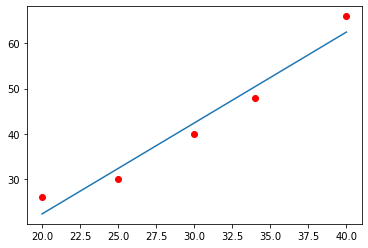

In [49]:
# 사이킷런으로 그린 차트
plt.plot(x,y,'ro')
plt.plot(x,model.predict(x))
plt.show()

In [50]:
print(model.coef_) # 기울기
print(model.intercept_) # 절편

[[2.00996678]]
[-17.89700997]


In [67]:
y_hat = model.predict(x)
# print(y_hat)
# print(x*model.coef_+model.intercept_)
np.sum((y-y_hat)**2)/(len(x))

8.635215946843852

In [55]:
from sklearn.metrics import mean_squared_error
y_hat = model.predict(x)
mean_squared_error(y,y_hat)

8.635215946843852

## 6. 모델 성능평가 요소(회귀식)
- 결정계수 $R^2 = \frac{RSS}{TSS} = 1-\frac{SSE}{TSS}$

In [59]:
SSE=np.sum((y-model.predict(x))**2)
print('SSE:%.2f' % SSE)   # rss값은 sse값임. 
TSS=np.sum((y-np.mean(y))**2)
print('TSS:%.2f' % TSS)

print('R2= 1-SSE/TSS: %.2f'% (1-SSE/TSS ))

SSE:43.18
TSS:1016.00
R2= 1-SSE/TSS: 0.96


In [60]:
from sklearn.metrics import r2_score
y_hat=x*model.coef_+model.intercept_
print(y_hat) # 예측값
r2_score(y,y_hat)  # 사이킷런 제공 R2값

[[22.30232558]
 [32.35215947]
 [42.40199336]
 [50.44186047]
 [62.50166113]]


0.9575038585293117

- 정리
- 최종결과가 1개의 무한대의 숫자일 때는 선형 회귀식을 사용함
- 선형회귀식은 wx+b로서 w값과 b값을 계산하여 y예측값을 만들고 그 y예측값과 y값과의 차이를 이용하여서 평가지표를 삼음<br>
<br>
- 데이터 선형회귀 순서(선형회귀식에 들어가는 자료는 array여야 함)
1. 전처리
2. x변수(특징값, 독립변수)와 y변수 분할
3. 훈련과 테스트 데이터 분할(처음부터 분할해서 들어와도 됨)
4. sklearn의 선형회귀식 import
5. model.fit(x,y) # 모델피팅하면 w,b가 생성됨
6. model.predict(x) # w,b를 이용하여서 x값에 대한 y_hat을 구함
7. $R^2$로 w,b의 유효성을 판단하고 (다양한 평가지표 있음.)
8. 테스트 데이터로 다시 예측해보고, $R^2$값으로 다시 판단해봄

## 7. OLS(최소제곱법) 선형회귀

In [79]:
!pip install statsmodels > /dev/null

In [82]:
# https://datacook.tistory.com/39

import statsmodels.api as sm
lr = sm.OLS(y,x)
result= lr.fit() 
print(result.summary())
result.params

# 우리 프로젝트에서 통계했음을 티내고 싶은 발표는 
# p-value값을 통해서 독립변수 탄수화물 섭취량을 확인한 결과 0.03으로서
# x값으로서의 필요조건을 맞추어서 귀무가설을 기각하고 
# 대립가설 탄수화물 섭취에 따르는 혈당의 영향은 있음을 채택하였습니다.

# 일반 업무에서는
# 혈압이 높은 20명과 혈압이 낮은 20명의 일반인군의 탄수화물 섭취량을 대조 비교한 결과
# 두 집단간의 탄수화물 섭취량은 약 20%의 차이가 있음을 확인하였습니다.
# 이에 탄수화물 섭취량이 혈압에 많은 영향을 줌을 유추할 수 있습니다.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              309.3
Date:                Mon, 13 Sep 2021   Prob (F-statistic):                    6.14e-05
Time:                        07:21:39   Log-Likelihood:                         -15.153
No. Observations:                   5   AIC:                                      32.31
Df Residuals:                       4   BIC:                                      31.92
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

array([1.44029054])

## 8. 모델 저장 및 재활용

In [68]:
# https://cyan91.tistory.com/39

import pickle

In [69]:
filename='StartLr.sav'
pickle.dump(model,open(filename,'wb')) # 모델 저장

In [ ]:
# 회귀식 로드
# w,b는 새로 만듦. 일의 순서를 pickle에 저장하여 불러옴.
import pickle
x=[[20],[25],[30],[34],[40]]
y=[[26],[30],[40],[48],[66]]

#

load_model=pickle.load(open('StartLr.sav','rb')) # 모델 불러옴
print(load_model.score(x,y))

print(load_model.predict([[3]]))